### Problem #1

In [14]:
import pickle
from pandas_profiling import ProfileReport
import bz2
import random
import os
import pandas as pd

In [5]:
ifile = bz2.BZ2File("R3K_Daily.bz2",'rb')
week_1_df = pickle.load(ifile)
ifile.close()


In [6]:
p = ProfileReport(week_1_df)
p.to_file("ProfileReportAllFields.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
week_1_df.head()

,Date,Open,High,Low,Close,UnAdjustedClose,Volume,Symbol
0,2000-12-01,33.287973,34.388402,33.170070,33.327274,53.0000,36286,A
1,2000-12-04,32.737759,33.366575,31.755233,32.069641,51.0000,28951,A
2,2000-12-05,33.170070,35.017219,33.052167,34.624208,55.0625,54723,A
3,2000-12-06,34.742111,35.803239,32.698458,32.698458,52.0000,43669,A
4,2000-12-07,33.012866,34.506305,32.305447,33.956091,54.0000,30599,A


##### The Pickle format is more efficient than CSV formatting. It is faster and lighter than CSVs and allows the user to serialize any type of python object (not solely data). I think the main advantage as it concerns this course is that you can use the pickle functionality to save machine learning models.

##### One advantage dataframes have over numpy arrays is that arrays can only contain data objects of the same types, while dataframes can contain multiple datatypes. For machine learning models this presents obvious advantages as we can use the dataframe object to evaluate numerical data as well as text data. 

### Problem 2

In [8]:
dual_class_stocks = []
symbol_list = week_1_df['Symbol'].unique().tolist()
for sym in symbol_list:
    if "." in sym:
        dual_class_stocks.append(sym)

In [9]:
print(dual_class_stocks)

['BF.A', 'BF.B', 'BRK.B', 'CRD.B', "FCE.A'", 'HEI.A', 'JW.A', 'LEN.B', 'MOG.A']


##### An example of Dual class stocks contained in the data would be BF.A and BF.B which are different classes of stock in the Brown-Forman Corp

### Problem 3

In [10]:
minimum_close = week_1_df[week_1_df['Close'] == week_1_df['Close'].min()]

In [11]:
minimum_close

,Date,Open,High,Low,Close,UnAdjustedClose,Volume,Symbol
3707037,2004-10-25,0.008893,0.008893,0.008893,0.008893,0.01,11,WETF


##### The minimum closing price was .008893 for the stock WETF on October 25, 2004. Each exchange has there own rules about minimum values required to retain listing eligibilty. It is likely this stock would be traded over the counter or on the pink sheets, but I couldnt find any SEC rules online prohibbiting stocks from trading for less than a penny. The cause of such low prices would be that equity in the company is not very valuable.

### Problem 4

##### What does “Rejected” mean next to the line “High is highly correlated with Close”? This isn't present in the profiling report, but it seems pretty self explanatory that any column that displayed that shows a low correlation coefficient with the 'Close' Column.


### Problem 5

In [12]:
kors_df = week_1_df[week_1_df['Symbol'].isin(['KORS'])].rename(columns={"Close": "Kors_Close"})
capri_df = week_1_df[week_1_df['Symbol'].isin(['CPRI'])].rename(columns={"Close": "Capri_Close"})

In [15]:
fashion_merged_df = pd.merge(kors_df[['Date','Kors_Close']],capri_df[['Date','Capri_Close']],on='Date', how='outer')

In [16]:
fashion_merged_df.head()

,Date,Kors_Close,Capri_Close
0,2011-12-15,24.20,24.20
1,2011-12-16,24.10,24.10
2,2011-12-19,24.88,24.88
3,2011-12-20,25.45,25.45
4,2011-12-21,26.55,26.55


In [17]:
fashion_merged_df.tail()

,Date,Kors_Close,Capri_Close
1812,2019-03-04,NaN,45.07
1813,2019-03-05,NaN,45.17
1814,2019-03-06,NaN,46.00
1815,2019-03-07,NaN,44.70
1816,2019-03-08,NaN,43.58


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

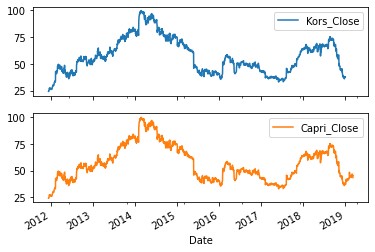

In [18]:
fashion_merged_df.plot.line(x='Date', y=['Kors_Close','Capri_Close'], subplots=True)

<AxesSubplot:xlabel='Date'>

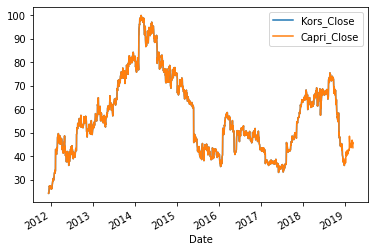

In [19]:
fashion_merged_df.plot.line(x='Date', y=['Kors_Close','Capri_Close'])

In [20]:
print(round(fashion_merged_df['Kors_Close'].corr(fashion_merged_df['Capri_Close']),4))

1.0


##### Yes it appears that the person who compiled this dataset backfilled all the data concerning 'CPRI''s value back to 2012 (to match that of 'KORS'  despite the fact that it did not exist until 2018. I think the proper way to handle this would be to treat them as distinct entities and leave all the values prior to 2018 for CPRI asa NaNs and everything post 2018 for 'KORS' as NaNs. 

### Problem 6

In [21]:
goog_df = week_1_df[week_1_df['Symbol'].isin(['GOOG'])].rename(columns={"Close": "GOOG_Close"})
googl_df = week_1_df[week_1_df['Symbol'].isin(['GOOGL'])].rename(columns={"Close": "GOOGL_Close"})

In [22]:
search_merged_df = pd.merge(goog_df[['Date','GOOG_Close']],googl_df[['Date','GOOGL_Close']],on='Date', how='outer')

In [23]:
search_merged_df.head()

,Date,GOOG_Close,GOOGL_Close
0,2004-08-19,49.982653,50.220220
1,2004-08-20,53.952772,54.209209
2,2004-08-23,54.495737,54.754755
3,2004-08-24,52.239195,52.487487
4,2004-08-25,52.802085,53.053053


In [24]:
search_merged_df.tail()

,Date,GOOG_Close,GOOGL_Close
3657,2019-03-04,1147.80,1153.42
3658,2019-03-05,1162.03,1169.19
3659,2019-03-06,1157.86,1164.94
3660,2019-03-07,1143.30,1150.85
3661,2019-03-08,1142.32,1149.97


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

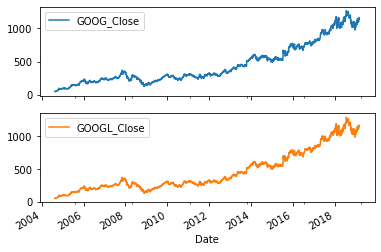

In [25]:
search_merged_df.plot.line(x='Date', y=['GOOG_Close','GOOGL_Close'], subplots=True)

<AxesSubplot:xlabel='Date'>

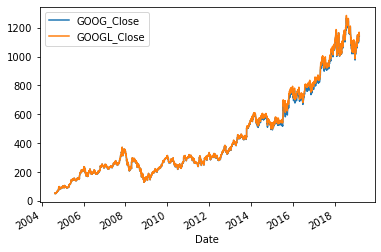

In [26]:
search_merged_df.plot.line(x='Date', y=['GOOG_Close','GOOGL_Close'])

In [27]:
print(round(search_merged_df['GOOG_Close'].corr(search_merged_df['GOOGL_Close']),4))

0.9998


##### While Goog and GOOGL nearly identical, from my understanding GOOGL granted its holders voting rights in the entity while GOOG did not, making the former very slightly more valuable. I think the way they are trated here as seperate entities is the proper way to handle this data. In fact due to the fact that they are both equity stakes in the same underlying entity, it is important to view them seperately as they are here, so that if they deviate from each other for some sort of supply/demand driven reason you could capitize on a reversion. 

### Problem 7

In [36]:
gov_df = week_1_df[week_1_df['Symbol'].isin(['GOV'])].rename(columns={"Close": "GOV_Close"})
opi_df = week_1_df[week_1_df['Symbol'].isin(['OPI'])].rename(columns={"Close": "OPI_Close"})

In [37]:
real_estate_merged_df = pd.merge(gov_df[['Date','GOV_Close']],opi_df[['Date','OPI_Close']],on='Date', how='outer')

In [40]:
real_estate_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2457 entries, 0 to 2456
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2457 non-null   datetime64[ns]
 1   GOV_Close  2412 non-null   float64       
 2   OPI_Close  2456 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 76.8 KB


In [46]:
real_estate_merged_df.tail(10)

,Date,GOV_Close,OPI_Close
2447,2019-02-25,NaN,30.45
2448,2019-02-26,NaN,30.32
2449,2019-02-27,NaN,29.95
2450,2019-02-28,NaN,30.51
2451,2019-03-01,NaN,28.28
2452,2019-03-04,NaN,27.98
2453,2019-03-05,NaN,28.07
2454,2019-03-06,NaN,27.50
2455,2019-03-07,NaN,26.50
2456,2019-03-08,NaN,26.34


In [48]:
print(round(real_estate_merged_df['GOV_Close'].corr(real_estate_merged_df['OPI_Close']),4))

1.0


<AxesSubplot:xlabel='Date'>

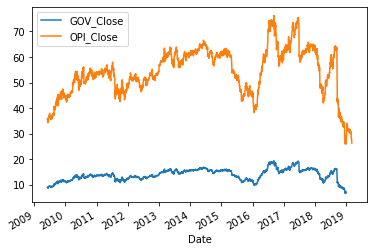

In [50]:
real_estate_merged_df.plot.line(x='Date', y=['GOV_Close','OPI_Close'])

###### This one is a little more difficult for me to see what the correct way to evaluate this is. It appears the person that compiled the data backfilled all data for OPI based off the reverse stock split by multiplying the value of GOV stock by 4 and making some slight adjustment that I can not understand (maybe due to dividends or doing some type of discounting the value off the risk free rate to the dates prior to the OPI entities existence?). Similar to the KORS/CAPRI example I think the proper way to treat this would be as two seperate entities, since OPI presumably has a different risk reward post merger than GOV did pre merger after adding an entirely new company into the fold.

### Problem 8

###### When there are multiple calsses of a stock I think generally it would make sense to include them both in a model. I understand that having 2 fields in a model that are perfectly correlated may cause colinearity problems in certain models, but I think most real ML models are more complex than the simple linear regression types where colinearity would cause issues. Also I think adding multiple classes of stock may add allow for the model to find opportunities it otherwise wouldnt in some cases. For instance, Berkshire Hathway's A shares cost somewhere around 400,000 each and their B shares cost ~400 dollars each. If available is being used as a constraint in the model, this would allow more flexibility in suggesting a position in Berkshire Hathaway. Also, although the shares represent equity in the same company, they still have different shareholders subject to different liquidity risks, etc. and it is conceivable that the 2 shares could deviate enough due to a supply/demand imbalance that there is an arbitrage opportunity between the two classes. 

### Problem 9

###### Survivorship bias is the bias in a dataset when it only considers 'surviving' stocks in a portfolio's performance (eg excluding stocks like Lehman Brothers, Enron, Woldcom, etc. from the dataset). It will alter the portfolio's performance in a way incinsistent with reality. A good example was in this weeks lecture, where a porftfolio was constructed solely of pinksheets stocks, which can be extraordinarily volatile. The ten stocks included in the lecture example had a large negative return over the time frame, but when you excluded all of the equities that went to zero and replaced them with ones that had 'survvied', it showed a large postive return, despite the fact that you obviously wouldn't know which ones were going to go to zero when the portfolio was constructed. To test for survivorship bias in the dataset, I would first look at what portion of the dataset's last clsoing price was not the date of the last record in the dataset (it looks like in this case that would be 127 of the 1056 total symbols), then see if any of those symbols lost all of their value while during the timeframe this dataset accounts for. It looks like there are 13 stocks that had a last close date earlier than the last recorded date in the data set that lost 99%+ of their value, so I think dataset does not have survivorship bias (see work below).

In [106]:
week_1_df.head()

,Date,Open,High,Low,Close,UnAdjustedClose,Volume,Symbol
0,2000-12-01,33.287973,34.388402,33.170070,33.327274,53.0000,36286,A
1,2000-12-04,32.737759,33.366575,31.755233,32.069641,51.0000,28951,A
2,2000-12-05,33.170070,35.017219,33.052167,34.624208,55.0625,54723,A
3,2000-12-06,34.742111,35.803239,32.698458,32.698458,52.0000,43669,A
4,2000-12-07,33.012866,34.506305,32.305447,33.956091,54.0000,30599,A


In [107]:
mins_and_max_df = week_1_df.groupby('Symbol').Close.agg(['min', 'max']) 

In [111]:
first_record_df = week_1_df.groupby('Symbol').nth(0).reset_index()
first_record_df = first_record_df[['Symbol','Date', 'Close']].rename(columns={"Date":"First_Date","Close":"First_Close"})
last_record_df = week_1_df.groupby('Symbol').nth(-1).reset_index()
last_record_df = last_record_df[['Symbol','Date', 'Close']].rename(columns={"Date":"Last_Date","Close":"Last_Close"})
#first_record_df.head()

In [112]:
first_and_last_df = pd.merge(first_record_df,last_record_df,on='Symbol', how='outer')
first_and_last_df = first_and_last_df[['Symbol', 'First_Date', 'Last_Date', 'First_Close', 'Last_Close']]

In [113]:
first_and_last_df['Perc_Change'] = round(((first_and_last_df['Last_Close'] - first_and_last_df['First_Close'])/first_and_last_df['First_Close'])*100,2)

In [114]:
first_and_last_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056 entries, 0 to 1055
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Symbol       1056 non-null   object        
 1   First_Date   1056 non-null   datetime64[ns]
 2   Last_Date    1056 non-null   datetime64[ns]
 3   First_Close  1056 non-null   float64       
 4   Last_Close   1056 non-null   float64       
 5   Perc_Change  1056 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 57.8+ KB


In [116]:
not_last_date_available_df = first_and_last_df[first_and_last_df['Last_Date'] != '2019-03-08']

In [117]:
not_last_date_available_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 8 to 1047
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Symbol       127 non-null    object        
 1   First_Date   127 non-null    datetime64[ns]
 2   Last_Date    127 non-null    datetime64[ns]
 3   First_Close  127 non-null    float64       
 4   Last_Close   127 non-null    float64       
 5   Perc_Change  127 non-null    float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 6.9+ KB


In [120]:
not_last_date_available_df.sort_values(by = ['Perc_Change']).head(20)

,Symbol,First_Date,Last_Date,First_Close,Last_Close,Perc_Change
717,OREXQ',2007-04-30,2018-10-15,140.500000,0.01,-99.99
802,REXXQ',2007-07-25,2018-11-15,101.300000,0.02,-99.98
334,ERINQ',2008-05-22,2018-09-19,49.301561,0.01,-99.98
428,GSTCQ',2006-01-05,2018-11-21,19.400000,0.01,-99.95
427,GSTC,2006-01-05,2018-11-01,19.400000,0.02,-99.90
283,DHCP,2000-12-01,2019-02-11,96.640694,0.10,-99.90
774,PTX,2000-12-01,2019-03-04,130.044781,0.21,-99.84
801,REXX,2007-07-25,2018-05-21,101.300000,0.25,-99.75
426,GST,2006-01-05,2018-09-06,19.400000,0.06,-99.69
997,WAC,2000-12-01,2018-02-09,9664.000000,60.00,-99.38
